<a href="https://colab.research.google.com/github/ngcheeyuan/Learner-s-Repo-for-Tensorflow/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to regression with neural network in tensorflow

In [1]:
import tensorflow as tf
print(tf.__version__)

2.7.0


## Creating data to fit

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [42]:
X = np.arange(-100,100,3,dtype = float)
y = X+10

In [45]:
X = tf.constant(X, dtype = tf.float16)
y = tf.constant(y, dtype = tf.float16)

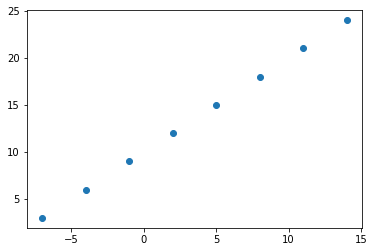

In [8]:
plt.scatter(X,y)

In [46]:
y == X + 10

<tf.Tensor: shape=(67,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])>

### Input and output shapes

In [47]:
#Create a demo tensor for our housing price prediction problems
house_info = tf.constant(['bedroom','bathroom','garage'])
house_price = tf.constant([9512312])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([9512312], dtype=int32)>)

In [48]:
input_shape = X.shape
output_shape = y.shape
input_shape , output_shape

(TensorShape([67]), TensorShape([67]))

In [49]:
X[0].ndim

0

In [50]:
X[0],y[0]

(<tf.Tensor: shape=(), dtype=float16, numpy=-100.0>,
 <tf.Tensor: shape=(), dtype=float16, numpy=-90.0>)

In [51]:
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(67,), dtype=float16, numpy=
 array([-100.,  -97.,  -94.,  -91.,  -88.,  -85.,  -82.,  -79.,  -76.,
         -73.,  -70.,  -67.,  -64.,  -61.,  -58.,  -55.,  -52.,  -49.,
         -46.,  -43.,  -40.,  -37.,  -34.,  -31.,  -28.,  -25.,  -22.,
         -19.,  -16.,  -13.,  -10.,   -7.,   -4.,   -1.,    2.,    5.,
           8.,   11.,   14.,   17.,   20.,   23.,   26.,   29.,   32.,
          35.,   38.,   41.,   44.,   47.,   50.,   53.,   56.,   59.,
          62.,   65.,   68.,   71.,   74.,   77.,   80.,   83.,   86.,
          89.,   92.,   95.,   98.], dtype=float16)>,
 <tf.Tensor: shape=(67,), dtype=float16, numpy=
 array([-90., -87., -84., -81., -78., -75., -72., -69., -66., -63., -60.,
        -57., -54., -51., -48., -45., -42., -39., -36., -33., -30., -27.,
        -24., -21., -18., -15., -12.,  -9.,  -6.,  -3.,   0.,   3.,   6.,
          9.,  12.,  15.,  18.,  21.,  24.,  27.,  30.,  33.,  36.,  39.,
         42.,  45.,  48.,  51.,  54.,  57.,  60.,  63.,  

In [52]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape , output_shape

(TensorShape([]), TensorShape([]))

In [53]:
# ## OLD
# # Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
 
# ## New
# # Fit the model
# model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) # <- updated line
# The code adds an extra dimension to X on the last axis, turning it ndim=1 to ndim=2 (what the model requires).

# To see a full explanation of this refer to the following:

### Steps in modelling with tensorflow.
1. Create a model - define the input and output layer , as well as the hidden layers
2. Compiing a model - define the loss function and the optimizer and evaluation metrics
3. Fitting a model - letting the model try to find pattersn between X & y

In [61]:
# set random seed
tf.random.set_seed(42)
#1. Create a model using the Sequential API
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(lr = 0.0001),
              metrics = ['mae'])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
3/3 [==============================] - 0s 5ms/step - loss: 22.5374 - mae: 22.5374
Epoch 2/100
3/3 [==============================] - 0s 6ms/step - loss: 21.8308 - mae: 21.8308
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 21.2423 - mae: 21.2423
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 20.4671 - mae: 20.4671
Epoch 5/100
3/3 [==============================] - 0s 4ms/step - loss: 19.8703 - mae: 19.8703
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 19.2563 - mae: 19.2563
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 18.4696 - mae: 18.4696
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 17.7081 - mae: 17.7081
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 17.0610 - mae: 17.0610
Epoch 10/100
3/3 [==============================] - 0s 5ms/step - loss: 16.4374 - mae: 16.4374
Epoch 11/100
3/3 [==============================] - 0s 6ms/

In [34]:
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [55]:
y_pred = model.predict([17])
y_pred

array([[16.543104]], dtype=float32)

### Improving our model

We can improve our model, by altering the steps we took to create a model.
1. Creating a model -We might add more layers, increase the number of hidden units within each of the hidden layers, change the activation function of each layer.

2. Compiling a model - we might change the optimization function of the learning rate of the optimization function

3. Fitting a model - here we might fit a model for more epochs, leaving it training for longer) or on more data (giving the model more examples to learn from)

In [78]:
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])
model.compile(loss =tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(lr = 0.01),
              metrics = ['mae']
              )

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
3/3 [==============================] - 0s 6ms/step - loss: 25.5596 - mae: 25.5596
Epoch 2/100
3/3 [==============================] - 0s 7ms/step - loss: 12.1583 - mae: 12.1583
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 10.8061 - mae: 10.8061
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 11.5632 - mae: 11.5632
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 9.9675 - mae: 9.9675
Epoch 6/100
3/3 [==============================] - 0s 6ms/step - loss: 9.9103 - mae: 9.9103
Epoch 7/100
3/3 [==============================] - 0s 6ms/step - loss: 10.2118 - mae: 10.2118
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 20.2324 - mae: 20.2324
Epoch 9/100
3/3 [==============================] - 0s 4ms/step - loss: 18.2016 - mae: 18.2016
Epoch 10/100
3/3 [==============================] - 0s 5ms/step - loss: 12.2472 - mae: 12.2472
Epoch 11/100
3/3 [==============================] - 0s 5ms/step

In [86]:
model.predict([17])

array([[37.196354]], dtype=float32)

In [93]:
model = tf.keras.Sequential([tf.keras.layers.Dense(30,activation =None),
                             tf.keras.layers.Dense(1)])

model.compile(loss =tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr = 0.001),
              metrics = ['mae']
              )

model.fit(tf.expand_dims(X, axis=-1), y, epochs=500)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/500
3/3 [==============================] - 0s 5ms/step - loss: 70.8430 - mae: 70.8430
Epoch 2/500
3/3 [==============================] - 0s 6ms/step - loss: 68.8618 - mae: 68.8618
Epoch 3/500
3/3 [==============================] - 0s 5ms/step - loss: 66.8397 - mae: 66.8397
Epoch 4/500
3/3 [==============================] - 0s 6ms/step - loss: 64.8952 - mae: 64.8952
Epoch 5/500
3/3 [==============================] - 0s 5ms/step - loss: 62.9196 - mae: 62.9196
Epoch 6/500
3/3 [==============================] - 0s 5ms/step - loss: 60.9778 - mae: 60.9778
Epoch 7/500
3/3 [==============================] - 0s 6ms/step - loss: 58.9935 - mae: 58.9935
Epoch 8/500
3/3 [==============================] - 0s 6ms/step - loss: 56.9949 - mae: 56.9949
Epoch 9/500
3/3 [==============================] - 0s 7ms/step - loss: 54.9971 - mae: 54.9971
Epoch 10/500
3/3 [==============================] - 0s 4ms/step - loss: 52.9829 - mae: 52.9829
Epoch 11/500
3/3 [==============================] - 0s 6ms/

In [96]:
model.predict([300.0])

array([[309.09464]], dtype=float32)

### Evaluating a model

In practice, a typical workflow you'll go through when building neural networks is:

Build a model -> fit it -> evaluate -> tweak -> fit...

In [196]:
X = tf.range(-10000,10000,4)
y = X +10

X = tf.cast(X, dtype = tf.float16)
y = tf.cast(y, dtype = tf.float16)

In [103]:
model = tf.keras.Sequential([tf.keras.layers.Dense(30,activation =None),
                             tf.keras.layers.Dense(1)])

model.compile(loss =tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr = 0.001),
              metrics = ['mae']
              )

model.fit(tf.expand_dims(X, axis=-1), y, epochs=500)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/500
16/16 [==============================] - 0s 2ms/step - loss: 138.8708 - mae: 138.8708
Epoch 2/500
16/16 [==============================] - 0s 2ms/step - loss: 33.7970 - mae: 33.7970
Epoch 3/500
16/16 [==============================] - 0s 2ms/step - loss: 14.9875 - mae: 14.9875
Epoch 4/500
16/16 [==============================] - 0s 2ms/step - loss: 10.2409 - mae: 10.2409
Epoch 5/500
16/16 [==============================] - 0s 2ms/step - loss: 9.4417 - mae: 9.4417
Epoch 6/500
16/16 [==============================] - 0s 2ms/step - loss: 9.2962 - mae: 9.2962
Epoch 7/500
16/16 [==============================] - 0s 2ms/step - loss: 9.1194 - mae: 9.1194
Epoch 8/500
16/16 [==============================] - 0s 2ms/step - loss: 8.9571 - mae: 8.9571
Epoch 9/500
16/16 [==============================] - 0s 2ms/step - loss: 8.7855 - mae: 8.7855
Epoch 10/500
16/16 [==============================] - 0s 2ms/step - loss: 8.8495 - mae: 8.8495
Epoch 11/500
16/16 [=============================

In [104]:
model.predict([20])

array([[29.979399]], dtype=float32)

In [199]:
#Split the data in to train and test sets

X_train =X[:int(len(X)*0.8)]
y_train =y[:int(len(y)*0.8)]

X_test =X[int(len(X)*0.8):]
y_test =y[int(len(y)*0.8):]

In [200]:
X_train[10],y_train[10]

(<tf.Tensor: shape=(), dtype=float16, numpy=-9960.0>,
 <tf.Tensor: shape=(), dtype=float16, numpy=-9950.0>)

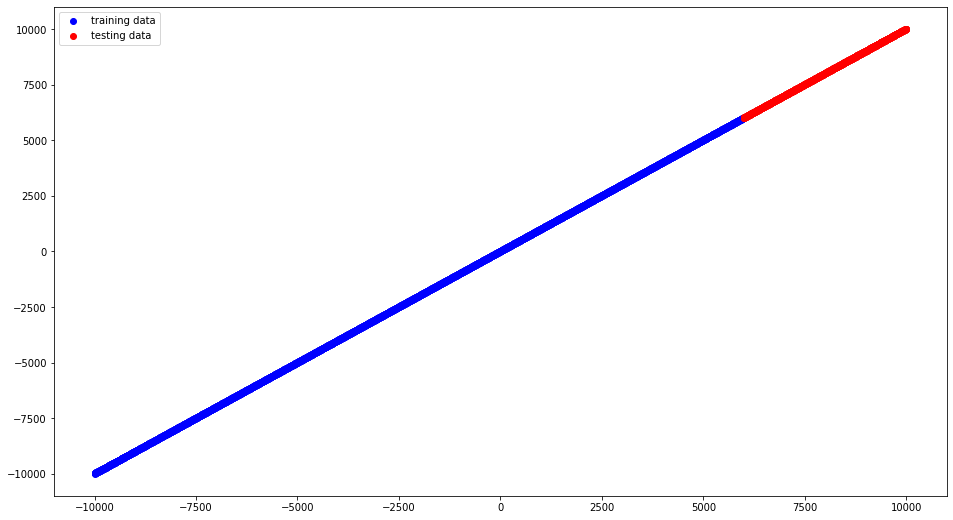

In [201]:
plt.figure(figsize = (16,9))
plt.scatter(X_train,y_train, c = 'blue' , label = 'training data')
plt.scatter(X_test,y_test, c = 'red' , label = 'testing data')
plt.legend();

In [202]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(50,activation =None),
                             tf.keras.layers.Dense(1)
])

model.compile(loss = 'mae',
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
              metrics = ['mae']
              )

model.fit(tf.expand_dims(X_train, axis=-1),y_train,epochs = 10)

Epoch 1/10
125/125 [==============================] - 1s 2ms/step - loss: 289.2575 - mae: 289.2575
Epoch 2/10
125/125 [==============================] - 0s 2ms/step - loss: 9.9023 - mae: 9.9023
Epoch 3/10
125/125 [==============================] - 0s 2ms/step - loss: 9.5011 - mae: 9.5011
Epoch 4/10
125/125 [==============================] - 0s 2ms/step - loss: 7.1969 - mae: 7.1969
Epoch 5/10
125/125 [==============================] - 0s 2ms/step - loss: 10.5358 - mae: 10.5358
Epoch 6/10
125/125 [==============================] - 0s 2ms/step - loss: 8.7656 - mae: 8.7656
Epoch 7/10
125/125 [==============================] - 0s 1ms/step - loss: 6.1543 - mae: 6.1543
Epoch 8/10
125/125 [==============================] - 0s 2ms/step - loss: 9.9963 - mae: 9.9963
Epoch 9/10
125/125 [==============================] - 0s 2ms/step - loss: 4.9184 - mae: 4.9184
Epoch 10/10
125/125 [==============================] - 0s 2ms/step - loss: 5.6307 - mae: 5.6307


In [203]:
model.summary()

Model: "sequential_62"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_103 (Dense)           (32, 50)                  100       
                                                                 
 dense_104 (Dense)           (32, 1)                   51        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [234]:
tf.random.set_seed(42)
model = tf.keras.Sequential([tf.keras.layers.Dense(50,activation =None , name = 'input_layer'),
                             tf.keras.layers.Dense(1,name = 'output_layer')],name = 'Hello_world')
model.compile(loss ='mae',
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
              metrics = ['mae'])

Total params -  total number of parameters in the mode.

Trainable parameters - these are the parameters(patterns) the model can update as it trains.

Non-trainable params - these parameters aren't updated during training (e.g. transfer learning)

In [235]:
model.fit(tf.expand_dims(X_train, axis=-1),y_train,epochs = 10)

Epoch 1/10
125/125 [==============================] - 1s 2ms/step - loss: 3424.1064 - mae: 3424.1064
Epoch 2/10
125/125 [==============================] - 0s 1ms/step - loss: 2535.8328 - mae: 2535.8328
Epoch 3/10
125/125 [==============================] - 0s 2ms/step - loss: 1614.9121 - mae: 1614.9121
Epoch 4/10
125/125 [==============================] - 0s 2ms/step - loss: 647.4970 - mae: 647.4970
Epoch 5/10
125/125 [==============================] - 0s 2ms/step - loss: 19.3082 - mae: 19.3082
Epoch 6/10
125/125 [==============================] - 0s 2ms/step - loss: 8.4917 - mae: 8.4917
Epoch 7/10
125/125 [==============================] - 0s 1ms/step - loss: 8.2585 - mae: 8.2585
Epoch 8/10
125/125 [==============================] - 0s 2ms/step - loss: 8.2284 - mae: 8.2284
Epoch 9/10
125/125 [==============================] - 0s 2ms/step - loss: 8.0881 - mae: 8.0881
Epoch 10/10
125/125 [==============================] - 0s 2ms/step - loss: 7.9561 - mae: 7.9561


In [236]:
model.summary()

Model: "Hello_world"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (32, 50)                  100       
                                                                 
 output_layer (Dense)        (32, 1)                   51        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [225]:
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)**0.5

2.8831075708576535

In [226]:
from tensorflow.keras.utils import plot_model

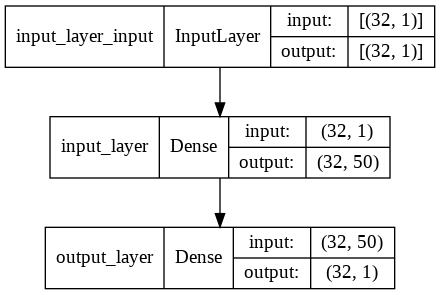

In [237]:
plot_model(model, show_shapes = True)

### Visualizing our model's predictions

In [239]:
# make some predictions

y_pred = model.predict(X_test)

In [247]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):
  
  plt.figure(figsize =(16,9))
  plt.scatter(train_data , train_labels , c = 'b' , label = 'training data')
  plt.scatter(test_data , test_labels ,  c = 'g', label = 'test data')
  plt.scatter(test_data,predictions,c = 'r' , label = 'predictions')
  plt.legend();

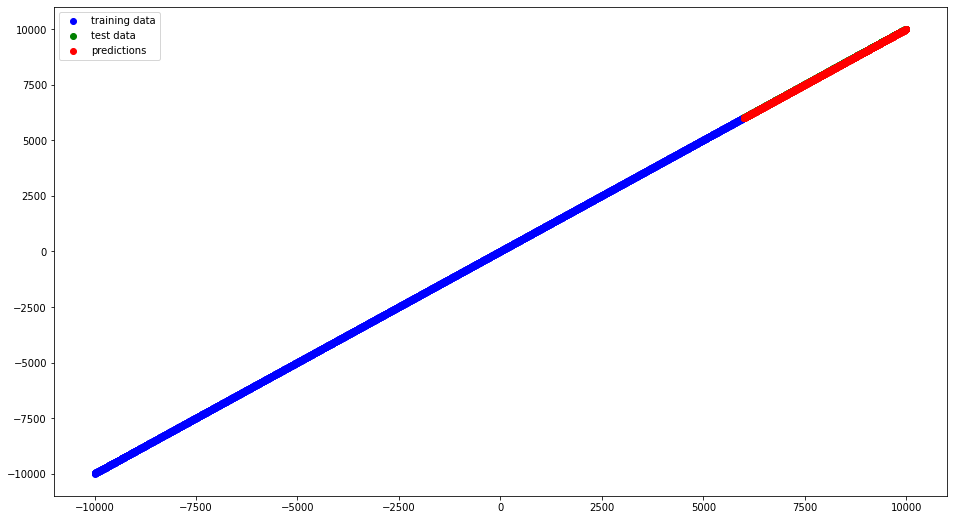

In [248]:
plot_predictions()

Evaluating our model's predictions with regression evaluation metrics

In [249]:
# Evaluate the model on the test 
model.evaluate(X_test,y_test)

32/32 [==============================] - 0s 1ms/step - loss: 14.3982 - mae: 14.1531


[14.39822769165039, 14.153050422668457]

In [257]:
#calculate the mae
mae = tf.keras.losses.mae(y_test,tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=14.492734>

In [258]:
tf.keras.losses.huber(y_test,tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=13.992734>

In [260]:
tf.keras.losses.mean_squared_error(y_test,tf.squeeze(y_pred))**0.5

<tf.Tensor: shape=(), dtype=float32, numpy=14.771125>

In [281]:
def mae(y_true,y_pred):
  return tf.keras.losses.mae(y_true=y_true,y_pred=tf.squeeze(y_pred))
def mse(y_true,y_pred):
  return tf.keras.losses.mean_squared_error(y_true=y_true,y_pred=tf.squeeze(y_pred))

In [265]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([tf.keras.layers.Dense(1)])
model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics = ['mae'])
model_1.fit(tf.expand_dims(X_train, axis=-1),y_train , epochs = 100)

Epoch 1/100
125/125 [==============================] - 1s 2ms/step - loss: 1798.5562 - mae: 1798.5562
Epoch 2/100
125/125 [==============================] - 0s 1ms/step - loss: 1745.7394 - mae: 1745.7394
Epoch 3/100
125/125 [==============================] - 0s 1ms/step - loss: 1692.8746 - mae: 1692.8746
Epoch 4/100
125/125 [==============================] - 0s 2ms/step - loss: 1640.0171 - mae: 1640.0171
Epoch 5/100
125/125 [==============================] - 0s 1ms/step - loss: 1587.2333 - mae: 1587.2333
Epoch 6/100
125/125 [==============================] - 0s 2ms/step - loss: 1534.4362 - mae: 1534.4362
Epoch 7/100
125/125 [==============================] - 0s 1ms/step - loss: 1481.6509 - mae: 1481.6509
Epoch 8/100
125/125 [==============================] - 0s 1ms/step - loss: 1428.8228 - mae: 1428.8228
Epoch 9/100
125/125 [==============================] - 0s 1ms/step - loss: 1376.0140 - mae: 1376.0140
Epoch 10/100
125/125 [==============================] - 0s 1ms/step - loss: 1323.2

In [266]:
y_preds_1 = model_1.predict(X_test)

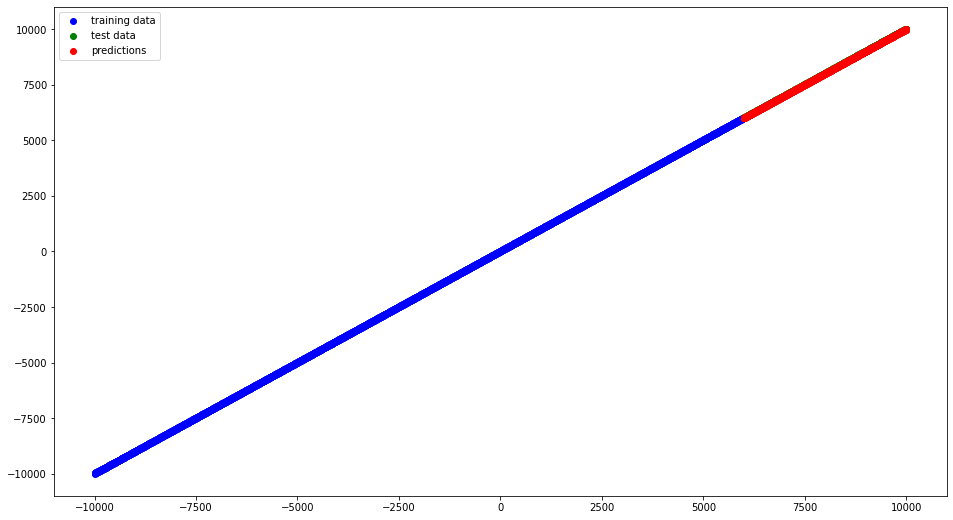

In [267]:
plot_predictions(predictions = y_preds_1)

In [299]:
mae_1 = mae(y_test,tf.squeeze(y_preds_1))
mse_1 = mse(y_test,tf.squeeze(y_preds_1))**0.5

In [274]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([tf.keras.layers.Dense(50),
                               tf.keras.layers.Dense(1)])
model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics = ['mae'])
model_2.fit(tf.expand_dims(X_train, axis=-1),y_train , epochs = 100)

Epoch 1/100
125/125 [==============================] - 1s 2ms/step - loss: 3424.1064 - mae: 3424.1064
Epoch 2/100
125/125 [==============================] - 0s 2ms/step - loss: 2535.8328 - mae: 2535.8328
Epoch 3/100
125/125 [==============================] - 0s 2ms/step - loss: 1614.9121 - mae: 1614.9121
Epoch 4/100
125/125 [==============================] - 0s 2ms/step - loss: 647.4970 - mae: 647.4970
Epoch 5/100
125/125 [==============================] - 0s 2ms/step - loss: 19.3082 - mae: 19.3082
Epoch 6/100
125/125 [==============================] - 0s 2ms/step - loss: 8.4917 - mae: 8.4917
Epoch 7/100
125/125 [==============================] - 0s 2ms/step - loss: 8.2585 - mae: 8.2585
Epoch 8/100
125/125 [==============================] - 0s 2ms/step - loss: 8.2284 - mae: 8.2284
Epoch 9/100
125/125 [==============================] - 0s 2ms/step - loss: 8.0881 - mae: 8.0881
Epoch 10/100
125/125 [==============================] - 0s 2ms/step - loss: 7.9561 - mae: 7.9561
Epoch 11/100
12

In [316]:
y_preds_2 = model_2.predict(X_test)

mse_2 = mse(y_test,y_preds_2)**0.5
mae_2 = mae(y_test,y_preds_2)

In [286]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)])
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics = ['mae'])
model_3.fit(tf.expand_dims(X_train, axis=-1),y_train , epochs = 200)

Epoch 1/200
125/125 [==============================] - 1s 2ms/step - loss: 4145.8828 - mae: 4145.8828
Epoch 2/200
125/125 [==============================] - 0s 2ms/step - loss: 3130.8860 - mae: 3130.8860
Epoch 3/200
125/125 [==============================] - 0s 2ms/step - loss: 2085.2371 - mae: 2085.2371
Epoch 4/200
125/125 [==============================] - 0s 2ms/step - loss: 985.7358 - mae: 985.7358
Epoch 5/200
125/125 [==============================] - 0s 2ms/step - loss: 80.1218 - mae: 80.1218
Epoch 6/200
125/125 [==============================] - 0s 2ms/step - loss: 8.5493 - mae: 8.5493
Epoch 7/200
125/125 [==============================] - 0s 2ms/step - loss: 8.3076 - mae: 8.3076
Epoch 8/200
125/125 [==============================] - 0s 2ms/step - loss: 8.2347 - mae: 8.2347
Epoch 9/200
125/125 [==============================] - 0s 2ms/step - loss: 8.1490 - mae: 8.1490
Epoch 10/200
125/125 [==============================] - 0s 2ms/step - loss: 7.9661 - mae: 7.9661
Epoch 11/200
12

In [320]:
y_preds_3 = model_3.predict(X_test)

mse_3 = mse(y_test,y_preds_3)**0.5
mae_3 = mae(y_test,y_preds_3)

In [289]:
model_3.evaluate(X_test,y_test)

32/32 [==============================] - 0s 1ms/step - loss: 2.4368 - mae: 2.3973


[2.4367806911468506, 2.397286891937256]

In [292]:
tf.random.set_seed(42)

model_4 =tf.keras.Sequential([
                              tf.keras.layers.Dense(10),
                              tf.keras.layers.Dense(1)
])

model_4.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00001),
                metrics = ['mae'])

model_4.fit(tf.expand_dims(X_train, axis=-1),y_train , epochs = 200)

Epoch 1/200
125/125 [==============================] - 1s 2ms/step - loss: 2651.0085 - mae: 2651.0085
Epoch 2/200
125/125 [==============================] - 0s 2ms/step - loss: 2614.8899 - mae: 2614.8899
Epoch 3/200
125/125 [==============================] - 0s 2ms/step - loss: 2578.6584 - mae: 2578.6584
Epoch 4/200
125/125 [==============================] - 0s 2ms/step - loss: 2542.3523 - mae: 2542.3523
Epoch 5/200
125/125 [==============================] - 0s 2ms/step - loss: 2506.0200 - mae: 2506.0200
Epoch 6/200
125/125 [==============================] - 0s 2ms/step - loss: 2469.5991 - mae: 2469.5991
Epoch 7/200
125/125 [==============================] - 0s 2ms/step - loss: 2433.1091 - mae: 2433.1091
Epoch 8/200
125/125 [==============================] - 0s 2ms/step - loss: 2396.5122 - mae: 2396.5122
Epoch 9/200
125/125 [==============================] - 0s 2ms/step - loss: 2359.8501 - mae: 2359.8501
Epoch 10/200
125/125 [==============================] - 0s 2ms/step - loss: 2323.1

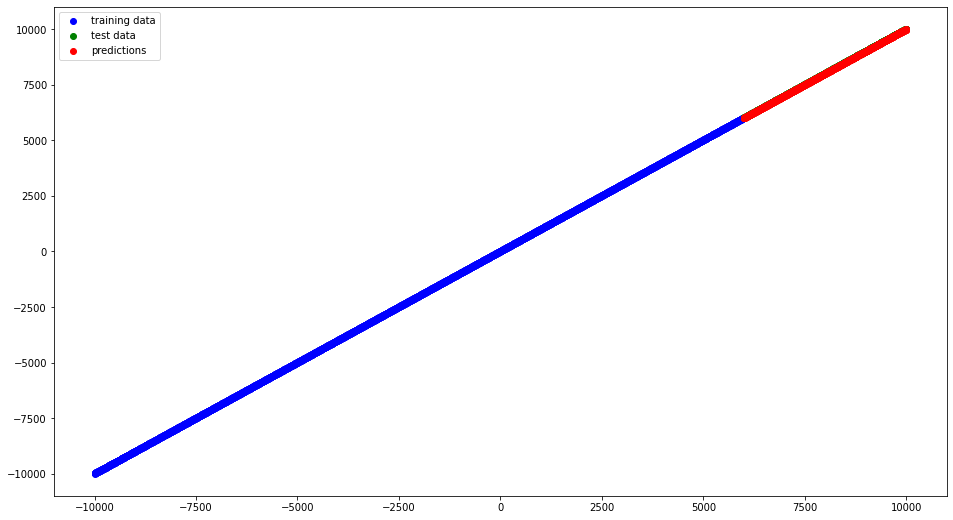

In [294]:
y_preds_4 = model_4.predict(X_test)
plot_predictions(predictions = y_preds_4)

In [312]:
mae_4 = mae(y_test,y_preds_4)
mse_4 = mse(y_test,y_preds_4)**0.5

In [321]:
import pandas as pd
model_results = [['model_1',mae_1.numpy(),mse_1.numpy()],
                 ['model_2',mae_2.numpy(),mse_2.numpy()],
                 ['model_3',mae_3.numpy(),mse_3.numpy()],
                 ['model_4',mae_4.numpy(),mse_4.numpy()]]
all_results = pd.DataFrame(model_results, columns = ['model','mae','mse'])

In [322]:
all_results

,model,mae,mse
0,model_1,18.692965,18.942373
1,model_2,2.239893,2.883107
2,model_3,2.454816,2.759735
3,model_4,17.852034,18.104015


In [323]:
model_2.summary()

Model: "sequential_71"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_113 (Dense)           (32, 50)                  100       
                                                                 
 dense_114 (Dense)           (32, 1)                   51        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


One of your main goals should be to minimize the time between your expirments.

TensorBoard - a component of the tensorflow library to help track modelling experiments
Weights and Biases

## Saving our models

1. The SavedModel Format
2. The HDF5 Format

In [325]:
model_2.save("bestmodel_savedmodel_format")

INFO:tensorflow:Assets written to: bestmodel_savedmodel_format/assets


In [326]:
model_2.save('best_model_hdf5_format.h5')

### Loading in a saved model

In [329]:
bestmodel = tf.keras.models.load_model("bestmodel_savedmodel_format")

In [331]:
bestmodel.summary()

Model: "sequential_71"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_113 (Dense)           (None, 50)                100       
                                                                 
 dense_114 (Dense)           (None, 1)                 51        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [332]:
model_2.summary()

Model: "sequential_71"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_113 (Dense)           (None, 50)                100       
                                                                 
 dense_114 (Dense)           (None, 1)                 51        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [333]:
np.allclose(bestmodel.predict(X_test),model_2.predict(X_test))

True

In [336]:
loaded_model = tf.keras.models.load_model('best_model_hdf5_format.h5')

In [337]:
np.allclose(loaded_model.predict(X_test),model_2.predict(X_test))

True

A larger example

In [430]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [431]:
df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [432]:
X = df.drop(columns = 'charges', axis = 'columns')
y = df['charges']

In [433]:
from sklearn.model_selection import train_test_split

In [434]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,shuffle = True,random_state=42)

In [389]:
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
                                       tf.keras.layers.Dense(30),
                                       tf.keras.layers.Dense(1)
])
insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
                        metrics = ['mae'])

In [390]:
insurance_model.fit(X_train,y_train,epochs = 100)

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 13243.9102 - mae: 13243.9102
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 13241.4473 - mae: 13241.4473
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 13238.9609 - mae: 13238.9609
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 13236.4473 - mae: 13236.4473
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 13233.8965 - mae: 13233.8965
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 13231.3193 - mae: 13231.3193
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 13228.6963 - mae: 13228.6963
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 13226.0420 - mae: 13226.0420
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 13223.3359 - mae: 13223.3359
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 13220.59

1. Add an extra layer with more hidden units
2. Train for longer

In [391]:
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
                                         tf.keras.layers.Dense(100),
                                         tf.keras.layers.Dense(10),
                                         tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0005),
                          metrics = ['mae']
                          )

insurance_model_2.fit(X_train,y_train,verbose = 1 , epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 13224.9580 - mae: 13224.9580
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 13167.8271 - mae: 13167.8271
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 13087.2861 - mae: 13087.2861
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 12966.6055 - mae: 12966.6055
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 12787.7979 - mae: 12787.7979
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 12533.6133 - mae: 12533.6133
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 12185.2109 - mae: 12185.2109
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 11727.9121 - mae: 11727.9121
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 11158.0996 - mae: 11158.0996
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 10498.58

In [394]:
insurance_model_2.evaluate(X_test,y_test)

11/11 [==============================] - 0s 2ms/step - loss: 6458.7544 - mae: 6458.7544


[6458.75439453125, 6458.75439453125]

In [395]:
insurance_model.evaluate(X_test,y_test)

11/11 [==============================] - 0s 2ms/step - loss: 12707.6445 - mae: 12707.6445


[12707.64453125, 12707.64453125]

In [409]:
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
                                         tf.keras.layers.Dense(50),
                                         tf.keras.layers.Dense(30),
                                         tf.keras.layers.Dense(10),
                                         tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005),
                          metrics = ['mae'])

history = insurance_model_3.fit(X_train,y_train, epochs = 200)

Epoch 1/200
32/32 [==============================] - 1s 2ms/step - loss: 13251.7949 - mae: 13251.7949
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 13186.9688 - mae: 13186.9688
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 13061.7617 - mae: 13061.7617
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 12794.7549 - mae: 12794.7549
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 12248.9297 - mae: 12248.9297
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 11246.1387 - mae: 11246.1387
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 9770.2988 - mae: 9770.2988
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 8245.8379 - mae: 8245.8379
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 7511.0459 - mae: 7511.0459
Epoch 10/200
32/32 [==============================] - 0s 3ms/step - loss: 7406.1743 - ma

Text(0.5, 0, 'epochs')

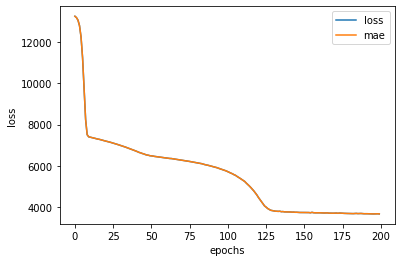

In [407]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [411]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [421]:
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
                                         tf.keras.layers.Dense(50),
                                         tf.keras.layers.Dense(30),
                                         tf.keras.layers.Dense(10),
                                         tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005),
                          metrics = ['mae'])

history = insurance_model_3.fit(X_train,y_train, epochs = 200)

Epoch 1/200
32/32 [==============================] - 1s 3ms/step - loss: 13267.8350 - mae: 13267.8350
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 13267.5439 - mae: 13267.5439
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 13267.1025 - mae: 13267.1025
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 13266.2314 - mae: 13266.2314
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 13264.2705 - mae: 13264.2705
Epoch 6/200
32/32 [==============================] - 0s 3ms/step - loss: 13259.8232 - mae: 13259.8232
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 13250.2686 - mae: 13250.2686
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 13231.6719 - mae: 13231.6719
Epoch 9/200
32/32 [==============================] - 0s 3ms/step - loss: 13199.0781 - mae: 13199.0781
Epoch 10/200
32/32 [==============================] - 0s 3ms/step - loss: 13146.79

Text(0.5, 0, 'epochs')

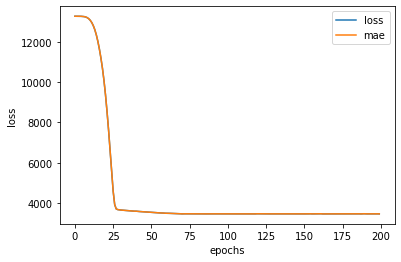

In [422]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [435]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [447]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split

In [445]:
ct = make_column_transformer((MinMaxScaler(),['age','bmi','children']),
                             (OneHotEncoder(handle_unknown='ignore'),['sex','smoker','region']),
                             remainder = 'passthrough'
                             )

In [446]:
X = df.drop('charges', axis = 1)
y = df['charges']

In [454]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25 , random_state = 42)

In [455]:
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

In [463]:
insurance_model_4 = tf.keras.Sequential([
                                        tf.keras.layers.Dense(50),
                                        tf.keras.layers.Dense(20),
                                        tf.keras.layers.Dense(1)
                                    ])

insurance_model_4.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(0.0005),
                          metrics = ['mae'])

history = model.fit(X_train,y_train, epochs = 300)

Epoch 1/300
32/32 [==============================] - 0s 2ms/step - loss: 3552.1765 - mae: 3552.1765
Epoch 2/300
32/32 [==============================] - 0s 2ms/step - loss: 3551.5322 - mae: 3551.5322
Epoch 3/300
32/32 [==============================] - 0s 2ms/step - loss: 3550.8352 - mae: 3550.8352
Epoch 4/300
32/32 [==============================] - 0s 2ms/step - loss: 3550.3904 - mae: 3550.3904
Epoch 5/300
32/32 [==============================] - 0s 2ms/step - loss: 3550.2510 - mae: 3550.2510
Epoch 6/300
32/32 [==============================] - 0s 2ms/step - loss: 3548.7986 - mae: 3548.7986
Epoch 7/300
32/32 [==============================] - 0s 2ms/step - loss: 3547.8684 - mae: 3547.8684
Epoch 8/300
32/32 [==============================] - 0s 3ms/step - loss: 3547.3838 - mae: 3547.3838
Epoch 9/300
32/32 [==============================] - 0s 2ms/step - loss: 3547.2432 - mae: 3547.2432
Epoch 10/300
32/32 [==============================] - 0s 2ms/step - loss: 3546.3101 - mae: 3546.3101

Text(0.5, 0, 'epochs')

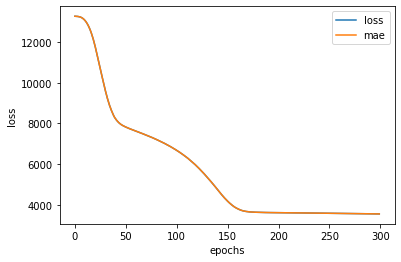

In [461]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [473]:
insurance_model_4.evaluate(X_test,y_test)

11/11 [==============================] - 0s 4ms/step - loss: 13277.7520 - mae: 13277.7520


[13277.751953125, 13277.751953125]

In [462]:
model.summary()

Model: "sequential_105"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_213 (Dense)           (None, 50)                600       
                                                                 
 dense_214 (Dense)           (None, 20)                1020      
                                                                 
 dense_215 (Dense)           (None, 1)                 21        
                                                                 
Total params: 1,641
Trainable params: 1,641
Non-trainable params: 0
_________________________________________________________________
